In [92]:
# call data.fif
import mne
import numpy as np

raw = mne.io.read_raw_fif('data.fif', preload=True)


Opening raw data file data.fif...
    Range : 0 ... 77357 =      0.000 ...   154.714 secs
Ready.
Reading 0 ... 77357  =      0.000 ...   154.714 secs...


C:\Users\FARHAN FRANAKA\AppData\Local\Temp\ipykernel_21212\3449398583.py:5: RuntimeWarning: This filename (data.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif('data.fif', preload=True)


In [93]:
events, events_id = mne.events_from_annotations(raw)
print(events_id)

Used Annotations descriptions: ['fist', 'hook', 'index', 'open', 'thumb']
{'fist': 1, 'hook': 2, 'index': 3, 'open': 4, 'thumb': 5}


In [94]:
raw.load_data()

Measurement date,Unknown
Experimenter,Unknown
Participant,Unknown
Digitized points,7 points
Good channels,4 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,500.00 Hz
Highpass,0.00 Hz
Lowpass,250.00 Hz


In [95]:
raw.filter(7., 35., fir_design='firwin')

picks = mne.pick_types(raw.info, meg=False, eeg=True, eog=False, stim=False,
                       exclude='bads')


tmin, tmax = 1., 4.
event_id = dict({'fist': 1, 'hook': 2, 'index': 3, 'open': 4, 'thumb': 5})

epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True, picks=picks,
                baseline=None, preload=True)

Filtering raw data in 5 contiguous segments
Setting up band-pass filter from 7 - 35 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 7.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 6.00 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 8.75 Hz (-6 dB cutoff frequency: 39.38 Hz)
- Filter length: 825 samples (1.650 s)

Not setting metadata
152 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 152 events and 1501 original time points ...
15 bad epochs dropped


<Evoked | 'hook' (average, N=13), 1 – 4 s, baseline off, 4 ch, ~60 kB>


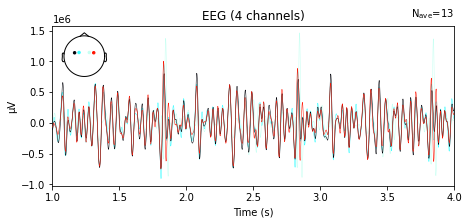

<Evoked | 'index' (average, N=21), 1 – 4 s, baseline off, 4 ch, ~60 kB>


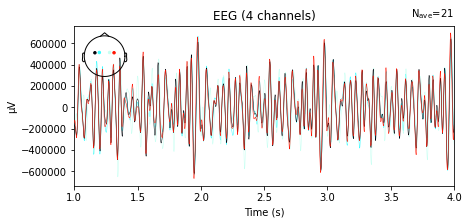

<Evoked | 'open' (average, N=29), 1 – 4 s, baseline off, 4 ch, ~60 kB>


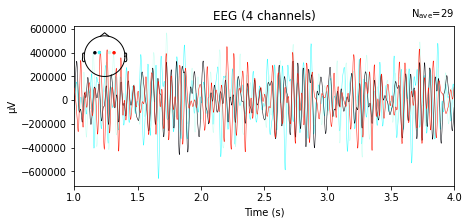

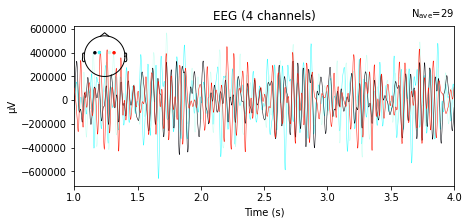

In [78]:
evoked = epochs['hook'].average()
print(evoked)
evoked.plot(time_unit='s')

evoked = epochs['index'].average()
print(evoked)
evoked.plot(time_unit='s')

evoked = epochs['open'].average()
print(evoked)
evoked.plot(time_unit='s')

In [96]:
# Getting labels and changing labels from 7,8,9,10 -> 1,2,3,4
labels = epochs.events[:,-1]

data = epochs.get_data()
print(data.shape)

(137, 4, 1501)


C:\Users\FARHAN FRANAKA\AppData\Local\Temp\ipykernel_21212\3725288746.py:4: FutureWarning: The current default of copy=False will change to copy=True in 1.7. Set the value of copy explicitly to avoid this warning
  data = epochs.get_data()


In [97]:
import pywt

# signal is decomposed to level 5 with 'db4' wavelet

def wpd(X): 
    coeffs = pywt.WaveletPacket(X,'db4',mode='symmetric',maxlevel=5)
    return coeffs
             
def feature_bands(x):
    
    Bands = np.empty((8,x.shape[0],x.shape[1],53)) # 8 freq band coefficients are chosen from the range 4-32Hz
    
    for i in range(x.shape[0]):
        for ii in range(x.shape[1]):
             pos = []
             C = wpd(x[i,ii,:]) 
             pos = np.append(pos,[node.path for node in C.get_level(5, 'natural')])
             for b in range(1,9):
                 Bands[b-1,i,ii,:] = C[pos[b]].data
        
    return Bands

wpd_data = feature_bands(data)
print(wpd_data.shape)

(8, 137, 4, 53)


In [98]:
from mne.decoding import CSP 
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import ShuffleSplit

# OneHotEncoding Labels
enc = OneHotEncoder()
X_out = enc.fit_transform(labels.reshape(-1,1)).toarray()
print(X_out)
# Cross Validation Split
cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)
print(cv)

from sklearn.metrics import accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

acc = []
ka = []
prec = []
recall = []

[[0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0.

In [99]:
import numpy as np
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, cohen_kappa_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from mne.decoding import CSP

for train_idx, test_idx in cv.split(labels):

    Csp = [];ss = []
    
    label_train, label_test = labels[train_idx], labels[test_idx]
    y_train, y_test = X_out[train_idx], X_out[test_idx]
    
    # Extraction features 
    Csp = [CSP(n_components=4, reg=None, log=True, norm_trace=False) for _ in range(8)]
    ss = preprocessing.StandardScaler()

    X_train = ss.fit_transform(np.concatenate(tuple(Csp[x].fit_transform(wpd_data[x,train_idx,:,:],label_train) for x  in range(8)),axis=-1))

    X_test = ss.transform(np.concatenate(tuple(Csp[x].transform(wpd_data[x,test_idx,:,:]) for x  in range(8)),axis=-1))
    
    # Build and train SVM classifier
    svm = SVC(kernel='linear', C=1, probability=True)
    svm.fit(X_train, label_train)
    
    # Predict on test data
    y_pred = svm.predict(X_test)
    y_prob = svm.predict_proba(X_test)
    
    pred = (y_prob == y_prob.max(axis=1)[:, None]).astype(int)
    
    # Calculate and store metrics
    acc.append(accuracy_score(label_test, y_pred))
    ka.append(cohen_kappa_score(label_test, y_pred))
    prec.append(precision_score(label_test, y_pred, average='weighted'))
    recall.append(recall_score(label_test, y_pred, average='weighted'))


Computing rank from data with rank=None
    Using tolerance 0.23 (2.2e-16 eps * 4 dim * 2.6e+14  max singular value)
    Estimated rank (data): 4
    data: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Estimating class=5 covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.22 (2.2e-16 eps * 4 dim * 2.5e+14  max singular value)
    Estimated rank (data): 4
    data: rank 4 computed from 4 data channels with 0 projectors
Reducing data rank from 4 -> 4
Estimating class=1 covariance using EMPIRICAL
Done.
Estimating class=2 covariance using EMPIRICAL
Done.
Estimating class=3 covariance using EMPIRICAL
Done.
Estimating class=4 covariance using EMPIRICAL
Done.
Estimating class=5 covariance using EMPIRICAL
Do

In [102]:
import pandas as pd

scores = {'Accuracy':acc,'Kappa':ka,'Precision':prec,'Recall':recall}

Es = pd.DataFrame(scores)

avg = {'Accuracy':[np.mean(acc)],'Kappa':[np.mean(ka)],'Precision':[np.mean(prec)],'Recall':[np.mean(recall)]}

Avg = pd.DataFrame(avg)


T = pd.concat([Es,Avg])

T.index = ['F1','F2','F3','F4','F5','F6','F7','F8','F9','F10','Avg']
T.index.rename('Fold',inplace=True)

print(T)

      Accuracy     Kappa  Precision    Recall
Fold                                         
F1    0.928571  0.909677   0.952381  0.928571
F2    0.964286  0.954397   0.971429  0.964286
F3    0.928571  0.900709   0.948980  0.928571
F4    0.964286  0.952542   0.976190  0.964286
F5    0.892857  0.862520   0.904762  0.892857
F6    0.857143  0.812395   0.914683  0.857143
F7    0.964286  0.953333   0.973214  0.964286
F8    0.964286  0.953719   0.969388  0.964286
F9    0.964286  0.954472   0.971429  0.964286
F10   0.892857  0.865169   0.898214  0.892857
Avg   0.932143  0.911893   0.948067  0.932143
